In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Grab and process the raw data.
#data_path = "amazon_cells_labelled.txt"
# data_path = "imdb_labelled.txt"
data_path = "yelp_labelled.txt"
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['message', 'sentiment']

In [67]:
# sms_raw.head(11)

In [68]:
# 


# keywords = ['horrible', 'not', 'Not', 'unfortunately', 'defective', 'poor', 'flaw', 'unhappy'
#             , 'none', 'junk', 'broken', 'break', 'worst', 'crap', 'disappoint', 'problem', 'problems'
#            , 'terrible' ]
# 312

keywords = ['horrible', 'not', 'un', 'defect', 'poor', 'flaw', 'cheap', 'less', 'counter', 'fake'
            , 'none', 'junk', 'broken', 'break', 'worst', 'crap', 'dis', 'problem', 'last', 'time'
            , 'terrible', "n\'t", 'return', 'joke', 'how', 'fail', 'china', 'chinese'
            , 'poor', 'worst', 'not', 'after', 'most', 'star', 'money', 'suck', '\?','!', '..', '--']
# 231

# keywords = ['horrible', 'not', 'un', 'defect', 'poor', 'flaw', 
#             'cheap', 'china', 'chinese', '\?', '!', '..', '--']
# 473

# keywords = ['cheap', 'china', 'chinese', '\?', '!', '..', '--']
# 457

# keywords = ['cheap', 'china', 'chinese']
# 493

for key in keywords:
    # match on generic pattern (including spaces)
    sms_raw[str(key)] = sms_raw.message.str.contains(
        #' ' + str(key) + ' ',
        str(key.lower()),
        case=False
    )

In [69]:
#sms_raw.head(11)

In [70]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['sentiment'] = (sms_raw['sentiment'] == 1)

In [71]:
sms_raw.head(11)

,message,sentiment,horrible,not,un,defect,poor,flaw,cheap,less,...,after,most,star,money,suck,\?,!,..,--,allcaps
0,Wow... Loved this place.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,Crust is not good.,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,Not tasty and the texture was just nasty.,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,Now I am getting angry and I want my damn pho.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,Honeslty it didn't taste THAT fresh.),False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,The potatoes were like rubber and you could te...,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,The fries were great too.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,A great touch.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


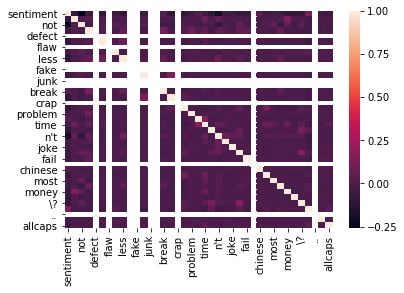

In [72]:
sns.heatmap(sms_raw.corr())

In [73]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['sentiment']
target[target == False].size

500

In [74]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 279


In [75]:
#data.head(11)
#target.head(11)
print('accuracy rate: ', 100*((data.shape[0] - (target != y_pred).sum())/data.shape[0]), '%')

accuracy rate:  72.1 %


In [76]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[277, 223],
       [ 56, 444]], dtype=int64)

In [77]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.635
Testing on Sample: 0.721


In [78]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=5)

array([0.65 , 0.695, 0.695, 0.74 , 0.71 ])

In [79]:
# imbalance-learn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification

# X, y = make_classification(n_classes=2, class_sep=2
#         , weights=[0.1, 0.9]
#         , n_informative=3
#         , n_redundant=1
#         , flip_y=0
#         , n_features=20
#         , n_clusters_per_class=1
#         , n_samples=1000
#         , random_state=10)

In [80]:
print('Original dataset shape {}'.format(Counter(target)))

Original dataset shape Counter({True: 500, False: 500})


In [81]:
sm = SMOTE(random_state=42)

In [82]:
X_res, y_res = sm.fit_sample(data, target)

In [83]:
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({True: 500, False: 500})


In [84]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_res, y_res)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [85]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
   X_res.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 279
